In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel(r'C:\Users\20192680\Documents\Practical process\Cp_methanol.xlsx')


In [134]:
Temp_list = df['Temperature'].values.tolist()
Cp_list = df['Cp'].values.tolist()
Temp_c = [x-273.15 for x in Temp_list]
a_fit, b_fit, c_fit = np.polyfit(Temp_list, Cp_list, deg=2)

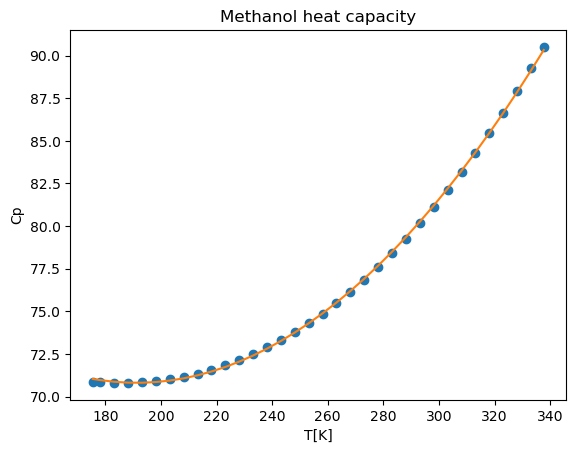

In [173]:

plt.plot(Temp_list, Cp_list, "o")
plt.plot(Temp_list, np.polyval((a_fit, b_fit, c_fit),Temp_list), "-")
plt.xlabel('T[K]') # label on the x axis
plt.ylabel('Cp') # label on the y axis
plt.title('Methanol heat capacity')
plt.show()

In [174]:
c = [a_fit,b_fit,c_fit]

In [175]:
df2 = pd.read_excel(r'C:\Users\20192680\Documents\Practical process\Cp_isopropanol.xlsx')
print(df2)

      Temp  Press     Cp  Temp_c
0   253.15    100  129.4   -20.0
1   258.15    100  130.6   -15.0
2   263.15    100  132.6   -10.0
3   268.15    100  135.0    -5.0
4   273.15    100  138.0     0.0
5   278.15    100  141.4     5.0
6   283.15    100  145.1    10.0
7   288.15    100  148.9    15.0
8   293.15    100  152.9    20.0
9   298.15    100  157.0    25.0
10  303.15    100  161.1    30.0
11  308.15    100  165.0    35.0
12  313.15    100  168.6    40.0
13  318.15    100  171.9    45.0
14  323.15    100  174.9    50.0


In [176]:
Temp_2 = df2['Temp'].values.tolist()
Cp_2 = df2['Cp'].values.tolist()
a_2, b_2, c_2 = np.polyfit(Temp_2, Cp_2, deg=2)
Temps = np.linspace(-20, 85, 22)
Tempsk  = [x+273.15 for x in Temps]

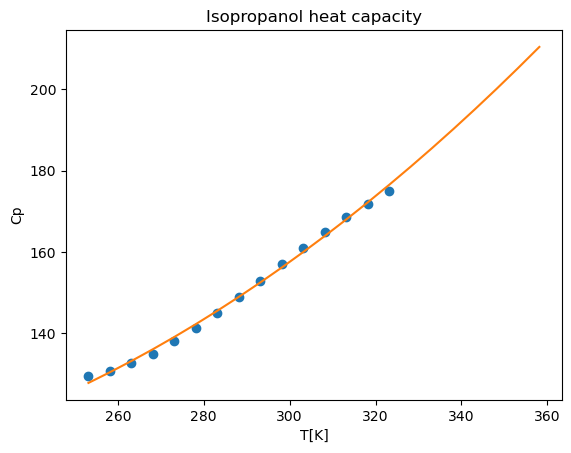

In [177]:
plt.plot(Temp_2, Cp_2, "o")
plt.plot(Tempsk, np.polyval((a_2, b_2, c_2), Tempsk), "-")
plt.xlabel('T[K]') # label on the x axis
plt.ylabel('Cp') # label on the y axis
plt.title('Isopropanol heat capacity')
plt.show()

In [178]:
c2 = [a_2, b_2, c_2]
c2

[0.002612152553328984, -0.8092406593406348, 165.23556132675765]

In [122]:
a = [x*0.5 for x in c]
b = [x*0.5 for x in c2]

In [140]:
a[0] = a[0]/3
a[1] = a[1]/2
b[0] = b[0]/4
b[1] = b[1]/3
b[2] = b[2]/2
print(a,b)

[5.054981716959294e-05, -0.04349967911082944, 52.04126530531012] [-3.7010851349096165e-06, 0.0058329472216252, -3.776425407587225, 1485.157967442571]


In [141]:
def line(a,b,T):
    dt  = (a[0]*T**3 + a[1]*T**2 + a[2]*T + b[0]*T**4 + b[1]*T**3 + b[2]*T**2 + b[3]*T)/2000
    return t

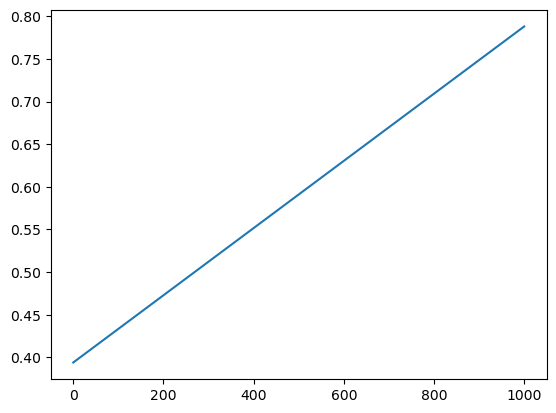

In [153]:
T = np.linspace(0,1000)
dt = line(a,b,T)
t2 = t*(dens_mix*V/Power)
plt.plot(T,t2)

In [191]:
def Cp_iso(T):
    Cp_iso = 0.002612152553328984 * T**2 -0.8092406593406348*T + 165.23556132675765
    return Cp_iso

In [192]:
def Cp_meth(T):
    Cp_meth = 0.0009098967090526729 * T**2 -0.34799743288663554 * T + 104.08253061062024
    return Cp_meth

In [193]:
def Cp_mix(n_meth, n_iso,T):
    Cp_mix = n_meth*Cp_meth(T) + n_iso*Cp_iso(T)
    return Cp_mix


In [194]:
Cp_mix(0.5, 0.5, T0)

118.616601575096

In [195]:
T0 = 298 #K
V  = 0.01 #m3
n_meth = 0.5 #molfrac
n_iso = 0.5 #molfrac
dens_meth = 792 #kg/m3
dens_iso = 786 #kg/m3
M_meth = 32.02 #g/mol
M_iso = 60.1 #g/mol
dens_mix = ((M_meth)/(M_iso+M_meth))*dens_meth + ((M_iso)/(M_iso+M_meth))*dens_iso
Power = 2000 #J/s
params = {
    'n_meth': n_meth,    # Volumetric flow rate
    'V': V,    # Volume of each CSTR
    'n_iso': n_iso, # Inlet concentration
    'dens': dens_mix,
    'power': Power
}
print(params)

{'n_meth': 0.5, 'V': 0.01, 'n_iso': 0.5, 'dens': 788.0855405992186, 'power': 2000}


In [196]:
from scipy.integrate import odeint

def model(T,t, params):
    density = params['dens']
    V = params['V']
    n_meth = params['n_meth']
    n_iso = params['n_iso']
    power = params['power']
    dTdt = (power)/(Cp_mix(n_meth,n_iso,T)*V*density)
    return dTdt

In [199]:
t = np.linspace(0, 500)

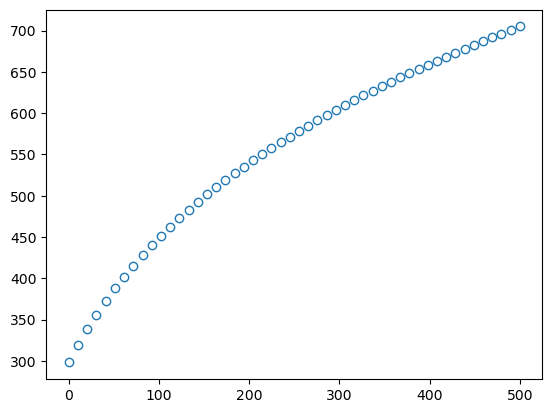

In [200]:
# Solve the ODE using odeint
y = odeint(model, T0, t, args=(params,))

plt.plot(t, y, "o", mfc='none', label='y(t) odeint')

In [187]:
y

array([[298.        ],
       [298.87175259],
       [299.7404891 ],
       [300.60622123],
       [301.46896089],
       [302.32871803],
       [303.18550746],
       [304.03934342],
       [304.89023743],
       [305.73820141],
       [306.58324784],
       [307.42538956],
       [308.26463947],
       [309.10101034],
       [309.9345152 ],
       [310.76516699],
       [311.59297888],
       [312.41796388],
       [313.24013516],
       [314.05950594],
       [314.87608949],
       [315.68989916],
       [316.5009484 ],
       [317.30925041],
       [318.11481843],
       [318.91766588],
       [319.71780622],
       [320.51525294],
       [321.31001956],
       [322.10211929],
       [322.89156552],
       [323.67837168],
       [324.46255122],
       [325.24411758],
       [326.02308415],
       [326.79946423],
       [327.57327117],
       [328.34451833],
       [329.11321909],
       [329.87938688],
       [330.64303466],
       [331.40417585],
       [332.16282364],
       [332